<a href="https://colab.research.google.com/github/Eren-Tuncer/ADA447Midterm/blob/main/Gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -Uqq fastai==2.7.19 torch==2.6

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 857.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 90.3 MB/s eta 0:00:00


# Imports


In [ ]:
from fastai.vision.all import *
from fastai.text.all import *
from fastai.collab import *
from fastai.tabular.all import *
import matplotlib.pyplot as plt
import kagglehub
import torch
import torch.nn as nn

## Data Preperation

### Data Loading

In [ ]:
# Download latest version
path = kagglehub.dataset_download("jangedoo/utkface-new")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/utkface-new


In [ ]:
path ="/kaggle/input/utkface-new/UTKFace"

In [ ]:
pathObj = Path(path)
pathObj.ls()

(#23708) [Path('/kaggle/input/utkface-new/UTKFace/26_0_2_20170104023102422.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/22_1_1_20170112233644761.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/21_1_3_20170105003215901.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/28_0_0_20170117180555824.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/17_1_4_20170103222931966.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/44_0_3_20170119201022260.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/35_0_2_20170116182734834.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/76_0_0_20170104213515132.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/36_1_0_20170116165722892.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/34_0_3_20170119200815948.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/18_1_0_20170104022856102.jpg.chip.jpg'),Path('/kaggle/input/utkface-new/UTKFace/40_1_1_20170113011948248.jpg.chip.jpg'),Path('/kaggle/input/utkface-ne

#### Data Inspection

In [ ]:
def label_func(x):
    return ['male', 'female'][int(x.name.split('_')[1])]
faces = DataBlock(blocks=(ImageBlock,CategoryBlock),
                  get_items=get_image_files,
                  splitter=RandomSplitter(seed=42),
                  get_y=label_func,
                  item_tfms=Resize(460),
                  batch_tfms=aug_transforms(size=224, min_scale=0.75))

dls = faces.dataloaders(path, bs=64)

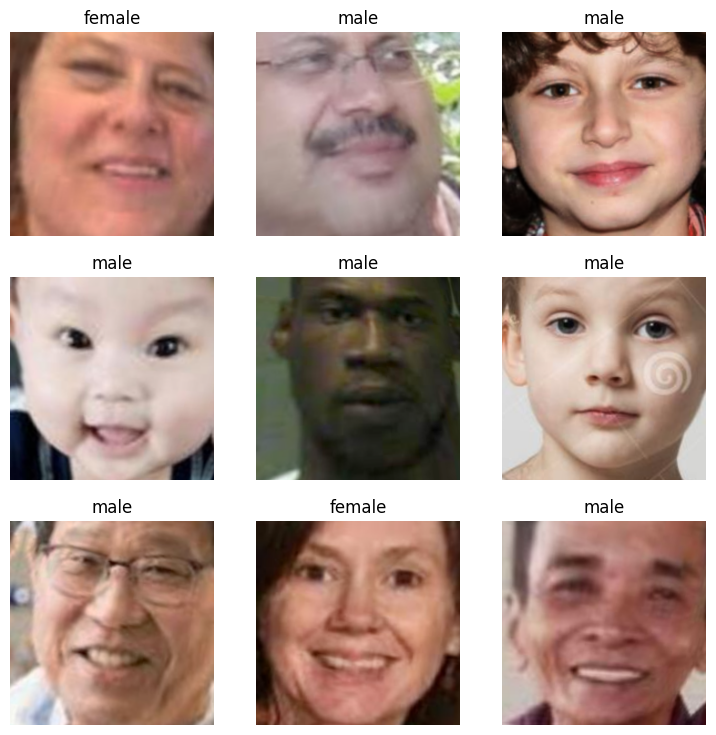

In [ ]:
dls.show_batch()

In [ ]:
faces.summary(path)

Setting-up type transforms pipelines
Found 23708 items
2 datasets of sizes 18967,4741
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /kaggle/input/utkface-new/UTKFace/32_0_0_20170117203115358.jpg.chip.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=200x200
  Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /kaggle/input/utkface-new/UTKFace/32_0_0_20170117203115358.jpg.chip.jpg
    applying <lambda> gives
      male
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(1)

Final sample: (PILImage mode=RGB size=200x200, TensorCategory(1))


Found 23708 items
2 datasets of sizes 18967,4741
Setting up Pipeline: PILBase.create
Setting up Pipeline: <lambda> -> Categorize -- {'vocab': None, 'sort': True, 'add_na': Fals

# Model Training

### Cosntructing The Simple Model

In [ ]:
learner = vision_learner(dls, resnet34, metrics=accuracy)

In [ ]:
learner.fit_one_cycle(4, 1e-3)

epoch,train_loss,valid_loss,accuracy,time
0,0.596068,0.360874,0.839907,02:49
1,0.357795,0.269503,0.884834,02:46
2,0.295980,0.241951,0.897279,02:47
3,0.284780,0.234770,0.899177,02:47


### Interpretation of The Model

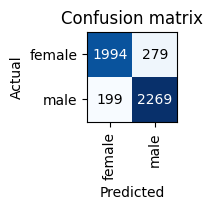

In [ ]:
interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(2, 2))

### Finding the optimal LR

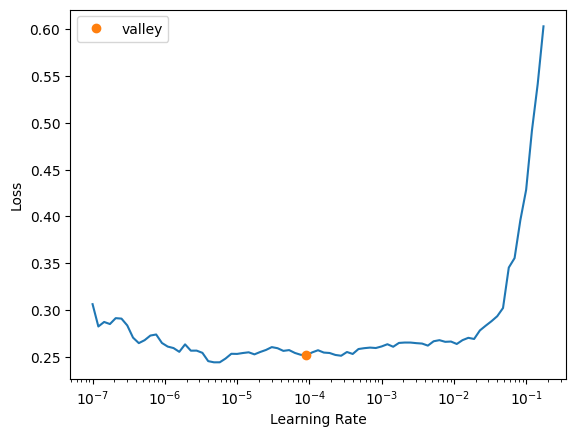

In [ ]:
lrs = learner.lr_find()

### Transfer Learning

In [ ]:
valley_lr = lrs.valley
print(valley_lr)

9.120108734350652e-05


In [ ]:
lr_val = valley_lr
learner.freeze()
learner.fit_one_cycle(4, lr_val)
learner.unfreeze()

epoch,train_loss,valid_loss,accuracy,time
0,0.253989,0.232873,0.900021,02:47
1,0.266469,0.229348,0.902974,02:49
2,0.245190,0.227083,0.903607,02:45
3,0.257679,0.226837,0.904872,02:44


### Discriminative Learning Rates

In [ ]:
lr_min = lr_val
lr_max = lr_val
learner.fit_one_cycle(4, slice(lr_val/100,lr_val))

epoch,train_loss,valid_loss,accuracy,time
0,0.250902,0.216859,0.907614,02:50
1,0.230266,0.203881,0.917739,02:51
2,0.200803,0.202007,0.915419,02:54
3,0.195485,0.199822,0.917950,02:52


In [ ]:
learner.export("export.pkl")

### Number Of Epochs


<Axes: title={'center': 'learning curve'}, xlabel='steps', ylabel='loss'>

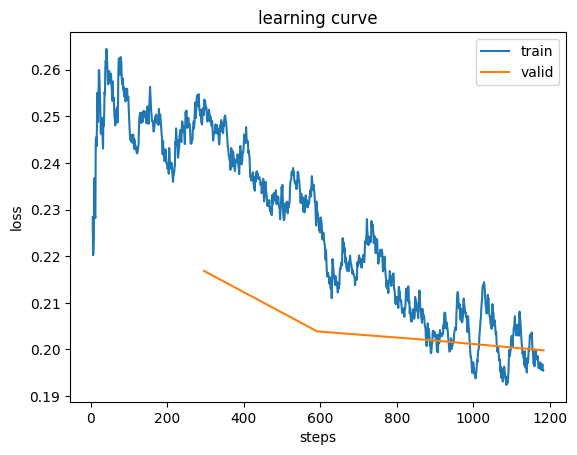

In [ ]:
learner.recorder.plot_loss()

In [ ]:
## training for 4 more epochs
learner.fit_one_cycle(4, slice(lr_val/100,lr_val))

epoch,train_loss,valid_loss,accuracy,time
0,0.207978,0.200323,0.918372,02:53
1,0.194695,0.193764,0.922590,02:54
2,0.189804,0.192387,0.924488,02:59
3,0.168837,0.191183,0.925754,03:09


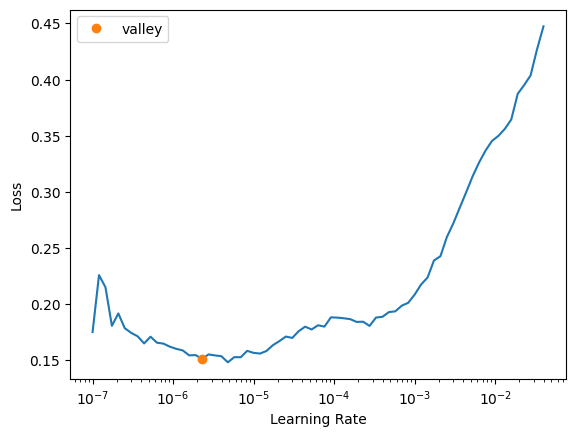

In [ ]:
lrs = learner.lr_find()
valley_2 = lrs.valley

In [ ]:
print(valley_2)

2.2908675418875646e-06


### Mixed Precision Training

In [ ]:
new_dls = faces.dataloaders(path, bs=32)
learner.dls = new_dls

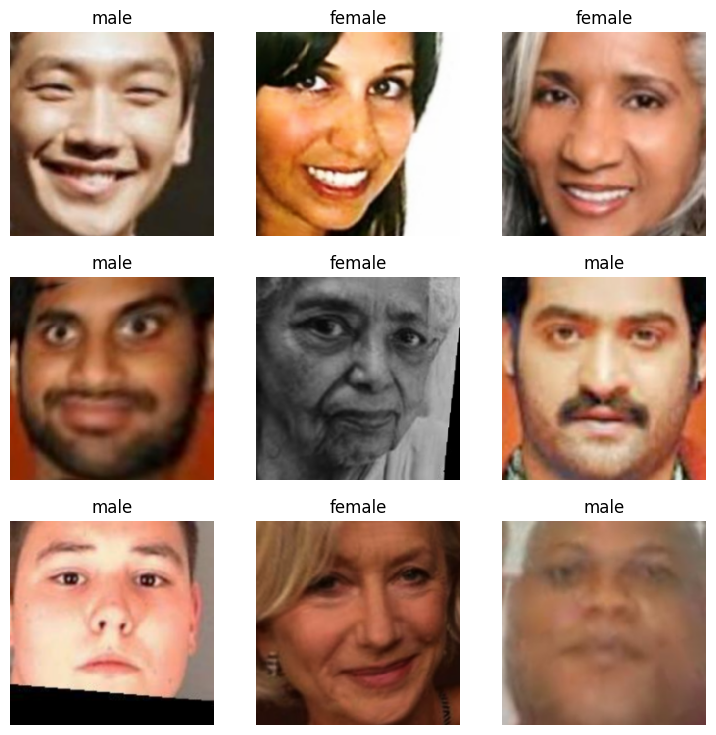

In [ ]:
new_dls.show_batch()

In [ ]:
lr_val2 = valley_2

In [ ]:
state_dict = learner.state_dict

fastai.learner.Learner

In [ ]:
learner2 = vision_learner(dls, resnet34, metrics=accuracy)
learner2 = learner2.to_fp16()
learner2.model.load_state_dict(learner.state_dict())
learner2.fit_one_cycle(4,lr_val2)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,0.172007,0.190987,0.925121,02:42
1,0.175037,0.192888,0.926176,02:31
2,0.170025,0.191011,0.925965,02:30
3,0.173845,0.191607,0.926176,02:28


In [ ]:
learner3 = vision_learner(new_dls, resnet50, pretrained=True, metrics=accuracy)
learner3.fit_one_cycle(4,lr_val2)

epoch,train_loss,valid_loss,accuracy,time
0,1.405975,1.068663,0.473740,02:53
1,1.385454,1.083019,0.468256,02:52
2,1.454469,1.048321,0.480700,02:48
3,1.414237,1.074287,0.472896,02:49


In [ ]:
learner3.fit_one_cycle(10,lr_val2)

epoch,train_loss,valid_loss,accuracy,time
0,1.385404,1.066108,0.485552,02:49
1,1.432744,1.051665,0.481333,02:53
2,1.458655,1.073323,0.479646,02:51
3,1.433374,1.063953,0.481755,02:51
4,1.379989,1.065120,0.469310,02:48
5,1.429574,1.040861,0.486184,02:49
6,1.350510,1.058917,0.473951,02:49
7,1.411182,1.064723,0.479857,02:49
8,1.420076,1.048276,0.478802,02:50
9,1.364577,1.056800,0.476904,02:47


In [ ]:
learner2.fit_one_cycle(4,lr_val2)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,0.173203,0.192022,0.925543,02:29
1,0.164011,0.192279,0.925543,02:30
2,0.165566,0.191729,0.926809,02:36
3,0.173710,0.190789,0.926809,02:35


In [ ]:
from google.colab import files
learner.export('ada447.pkl')

files.download('ada447.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>